# Sample Terason Analysis

## Select Image & Phantom and Parse

In [ ]:
from pyquantus.parse.terason import terasonRfParser

In [2]:
# Inputs
imagePath = "/Volumes/CREST Data/David_S_Data/Terason_Lymphedema_Data/62051-017/62051-017-03 Ld.mat"
phantomPath = "/Volumes/CREST Data/David_S_Data/Terason_Lymphedema_Data/image 4 phantom .mat.mat"

In [3]:
imgDataStruct, imgInfoStruct, refDataStruct, refInfoStuct = terasonRfParser(imagePath, phantomPath)

## ROI Selection (from GUI)

In [4]:
import pickle

pkl_name = "/Volumes/CREST Data/David_S_Data/Terason_Lymphedema_Data/a_sample_roi.pkl"

with open(pkl_name, "rb") as f:
    roi_info = pickle.load(f)

/var/folders/5z/myjw1nc12n3g808z31wz0kt80000gn/T/ipykernel_21693/3478926292.py:6: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  roi_info = pickle.load(f)


In [5]:
from pathlib import Path

assert roi_info["Image Name"] == Path(imagePath).name
assert roi_info["Phantom Name"] == Path(phantomPath).name

In [6]:
splineX = roi_info["Spline X"]
splineY = roi_info["Spline Y"]

## Analysis Config (from GUI)

In [7]:
from pyquantus.utc import AnalysisConfig

pkl_name = "/Volumes/CREST Data/David_S_Data/Terason_Lymphedema_Data/config.pkl"

with open(pkl_name, "rb") as f:
    config_info = pickle.load(f)
    
config = config_info["Config"]

## Spectral Analysis

In [8]:
from pyquantus.utc import SpectralAnalysis, UltrasoundImage

In [9]:
ultrasoundImage = UltrasoundImage()
ultrasoundImage.axialResRf = imgInfoStruct.axialRes
ultrasoundImage.lateralResRf = imgInfoStruct.lateralRes
ultrasoundImage.bmode = imgDataStruct.bMode
ultrasoundImage.phantomRf = refDataStruct.rf
ultrasoundImage.rf = imgDataStruct.rf

In [10]:
spectralAnalysis = SpectralAnalysis()
spectralAnalysis.ultrasoundImage = ultrasoundImage
spectralAnalysis.config = config
spectralAnalysis.splineX = splineX
spectralAnalysis.splineY = splineY

In [11]:
spectralAnalysis.generateRoiWindows()
spectralAnalysis.computeSpecWindows()

0

In [12]:
print(spectralAnalysis.attenuationCoef, spectralAnalysis.attenuationCorr)

1.053301559983692 1.0


In [13]:
spectralAnalysis.backScatterCoef

np.float64(0.04388768166554494)

In [14]:
spectralAnalysis.nakagamiParams

(np.float64(447.5414931452683), np.float64(0.15467310556419814))

In [15]:
print(spectralAnalysis.effectiveScattererDiameter, spectralAnalysis.effectiveScattererConcentration)

2.2246511088594022e-08 2.3767312690647237e+19


# Visualizations

In [16]:
import matplotlib.pyplot as plt
from pyquantus.utc import SpectralData

In [17]:
spectralData = SpectralData()
spectralData.spectralAnalysis = spectralAnalysis

In [18]:
spectralData.convertImagesToRGB()

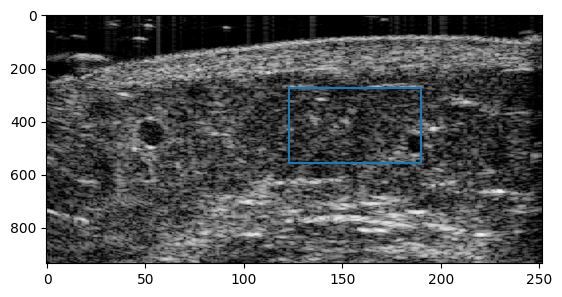

In [19]:
quotient = imgInfoStruct.depth / imgInfoStruct.width
plt.imshow(spectralData.finalBmode, aspect=quotient*(spectralData.finalBmode.shape[1]/spectralData.finalBmode.shape[0]))
plt.plot(spectralData.splineX, spectralData.splineY)

In [20]:
spectralData.drawCmaps()

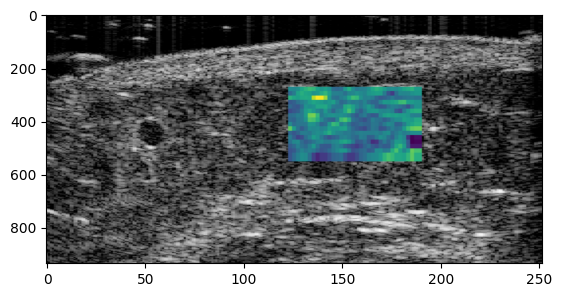

In [21]:
plt.imshow(spectralData.mbfIm, aspect=quotient*(spectralData.finalBmode.shape[1]/spectralData.finalBmode.shape[0]))

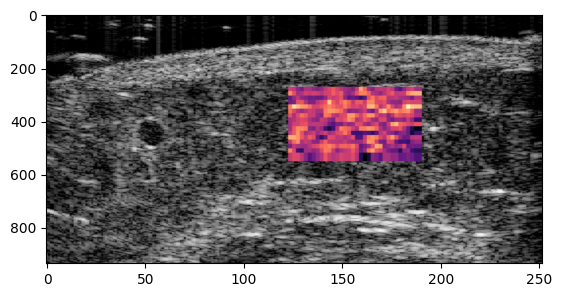

In [22]:
plt.imshow(spectralData.ssIm, aspect=quotient*(spectralData.finalBmode.shape[1]/spectralData.finalBmode.shape[0]))

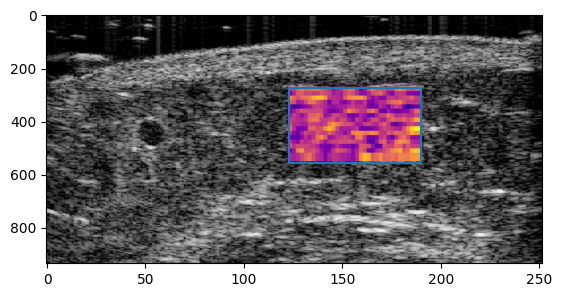

In [23]:
plt.imshow(spectralData.siIm, aspect=quotient*(spectralData.finalBmode.shape[1]/spectralData.finalBmode.shape[0]))
plt.plot(spectralData.splineX, spectralData.splineY)

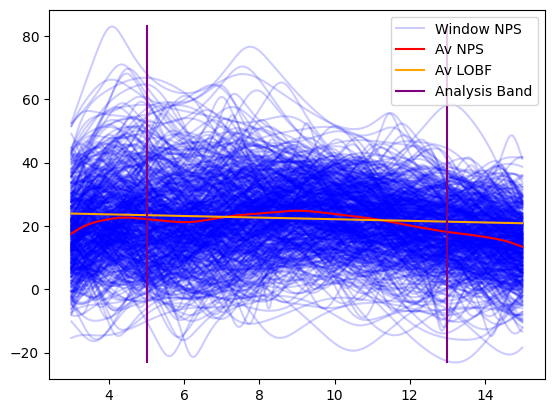

In [24]:
spectralData.plotPsData()